In [22]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
import math
import seaborn as sns

/usr/local/anaconda3/envs/data_science/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [40]:
class LogReg():
    def __init__(self, k=0.1, C=10):
        self.k = 0.1
        self.C = C
        self.w1 = 0
        self.w2 = 0
        self.weigts = []
        
    def predict(self, x1, x2):
        return 1 / (1 + np.exp(-self.w1 * x1 - self.w2 * x2))
    
    def fit(self, X, y):
        self.w1 = 0
        self.w2 = 0
        
        for i in range(10000):
            self.weigts.append([self.w1, self.w2])
#             self.w1 += self.k / X.shape[1] * np.sum(y * X[0] * (1 - 1 / (1 + np.exp(-y * (self.w1 * X[0] + self.w2 * X[1]))))) - self.k * self.C * self.w1
#             self.w2 += self.k / X.shape[1] * np.sum(y * X[1] * (1 - 1 / (1 + np.exp(-y * (self.w1 * X[0] + self.w2 * X[1]))))) - self.k * self.C * self.w2
            self.w1 += self.k / X.shape[1] * np.sum(y * X[0] * (1 - 1 / (1 + np.exp(-y * (self.w1 * X[0] + self.w2 * X[1])))))
            self.w2 += self.k / X.shape[1] * np.sum(y * X[1] * (1 - 1 / (1 + np.exp(-y * (self.w1 * X[0] + self.w2 * X[1])))))
            print('Iteration {}: {} {}'.format(i + 1, self.w1, self.w2))
            if np.abs(self.weigts[-1][0] - self.w1) < 1e-5 and np.abs(self.weigts[-1][1] - self.w2) < 1e-5:
                return self

In [5]:
data = pd.read_csv('data/data.csv', names=['target', 'f1', 'f2'])
X, y = data.drop(['target'], axis=1).to_numpy(), data['target'].to_numpy()

In [41]:
logreg = LogReg()

In [42]:
logreg = LogReg()
logreg.fit(X.T, y)

Iteration 1: 0.0357312663987411 0.028016732987911165
Iteration 2: 0.06292847226816159 0.04851186081734883
Iteration 3: 0.08449826243275993 0.06419655035370071
Iteration 4: 0.10224704315193857 0.0766188253765826
Iteration 5: 0.11723602801943371 0.08667960322404836
Iteration 6: 0.13012631033197442 0.09494413733603908
Iteration 7: 0.14135902090943642 0.10179320053501589
Iteration 8: 0.15124602121643904 0.10749835278166833
Iteration 9: 0.16001800574775585 0.11226198218288755
Iteration 10: 0.16785172276947055 0.11624010616231344
Iteration 11: 0.17488633937075368 0.11955617356586037
Iteration 12: 0.1812338138072048 0.12230987231998727
Iteration 13: 0.1869857733933106 0.12458300885896559
Iteration 14: 0.1922182538791119 0.12644358602368191
Iteration 15: 0.19699507377372266 0.12794872503395216
Iteration 16: 0.20137030476396595 0.1291468180997874
Iteration 17: 0.20539012413440158 0.13007915232768502
Iteration 18: 0.20909423268281857 0.13078116000184536
Iteration 19: 0.21251695955923286 0.131283

In [43]:
roc_auc_score(y, logreg.predict(X[:, 0], X[:, 1]))

0.9268571428571428

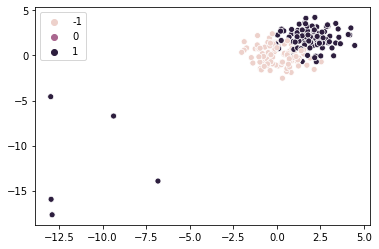

In [33]:
sns.scatterplot(X[:, 0], X[:, 1], hue=y)

In [36]:
np.unique(y)

array([-1,  1])